In [4]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

In [5]:
path_gcn4 = ['/Users/blandt/Desktop/Data/GCN4 fragment/210826_nwg383_tom4,5,60,500',
             '/Users/blandt/Desktop/Data/GCN4 fragment/210826_nwg384_tom4,5,60,500']
             
paths_gcn4 = direcslist(path_gcn4, 0)
print(len(paths_gcn4))
imgs_gcn4 = [load_image(p + '/af_corrected.tif') for p in paths_gcn4]
rois_gcn4 = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_gcn4]
straights_gcn4 = [straighten(i, r, 50, ninterp=500) for i, r in zip(imgs_gcn4, rois_gcn4)]
profiles_gcn4 = [bounded_mean_2d(s, [0, 1]) for s in straights_gcn4]
profiles_norm_gcn4 = [p / bounded_mean_1d(p, [0.95, 1]) for p in profiles_gcn4]

path_ctrl = '/Users/blandt/Desktop/Data/T2A/210804_nwg378_tom4,5,60,500'
paths_ctrl = direcslist(path_ctrl, 0)
print(len(paths_ctrl))
imgs_ctrl = [load_image(p + '/af_corrected.tif') for p in paths_ctrl]
rois_ctrl = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_ctrl]
straights_ctrl = [straighten(i, r, 50, ninterp=500) for i, r in zip(imgs_ctrl, rois_ctrl)]
profiles_ctrl = [bounded_mean_2d(s, [0, 1]) for s in straights_ctrl]
profiles_norm_ctrl = [p / bounded_mean_1d(p, [0.95, 1]) for p in profiles_ctrl]

6
6


<IPython.core.display.Javascript object>


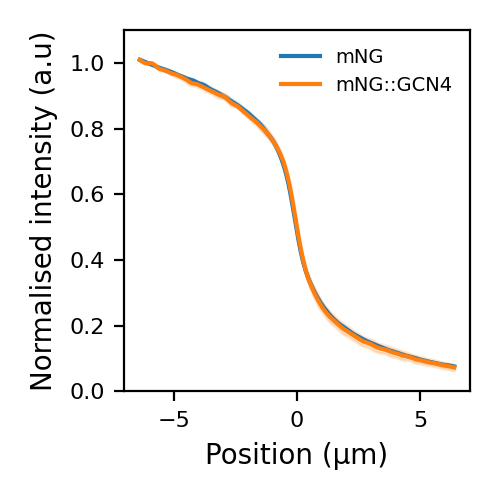

In [3]:
def func(profiles, ax, c, label):
    p_mean = np.mean(np.array(profiles), axis=0)[::-1]
    p_std = np.std(np.array(profiles), axis=0)[::-1]
    
    ax.plot(0.255 * np.linspace(-25, 25, 500), p_mean, c=c, label=label)
    ax.fill_between(0.255 * np.linspace(-25, 25, 500), p_mean - p_std, p_mean + p_std, color=c, alpha=0.2)

fig, ax = plt.subplots()
func(profiles_norm_ctrl, ax, 'tab:blue', 'mNG')
func(profiles_norm_gcn4, ax, 'tab:orange', 'mNG::GCN4')
ax.legend(fontsize=7, frameon=False)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Position (μm)')
ax.set_ylabel('Normalised intensity (a.u)')
ax.set_ylim(0, 1.1)
fig.set_size_inches(2.5, 2.5)
fig.tight_layout()
fig.savefig('Figs/profile.png', dpi=600, transparent=True)